**Проверить гипотезу о том, в каком варианте теста (control/personalization) больше конверсия (converted) и значимо ли это отличие статистически.**

**AB - тесты**

In [ ]:
# # Импортируем в свой скрипт библиотеку Pandas
import pandas as pd

#### Обьединение датасетов в датафрейм

In [ ]:
# 1 Вариант с merge

# обьединяем файлы в датасет
df1 = pd.read_csv('marketing_campaign.csv')
df2 = pd.read_csv('subscribers.csv')
df3 = pd.read_csv('users.csv')

df4 = df3.merge(df1, on = 'user_id', how = 'inner')
df_new = df4.merge(df2, on = 'user_id', how = 'inner')

df_new.head()

# tables = ['users.csv', 'subscribers.csv', 'marketing_campaign.csv'] не применяется

,user_id,age_group,language_preferred,date_served,marketing_channel,variant,language_displayed,converted,subscribing_channel,date_subscribed,date_canceled,is_retained
0,a1000,0-18 years,English,1/1/18,House Ads,personalization,English,True,House Ads,1/1/18,NaN,True
1,a1001,19-24 years,English,1/1/18,House Ads,personalization,English,True,House Ads,1/1/18,NaN,True
2,a1002,24-30 years,English,1/1/18,House Ads,personalization,English,True,House Ads,1/1/18,NaN,True
3,a1003,30-36 years,English,1/1/18,House Ads,personalization,English,True,House Ads,1/1/18,NaN,True
4,a1004,36-45 years,English,1/1/18,House Ads,personalization,English,True,House Ads,1/1/18,NaN,True


In [ ]:
 # 2 Вариант с join
 # обьединяем файлы в датасет
# tables = ['users.csv', 'marketing_campaign.csv', 'subscribers.csv']

In [ ]:
# считываем каждый файл с помощью цикла и помещаем в список
# 'user_id' указывается, для того, что бы не было проблем для обьединения джоинами
# df_list = [pd.read_csv (table, index_col='user_id') for table in tables]

In [ ]:
# df_list[0]

In [ ]:
# склеиваем датафреймы c помощью join
# df = df_list[0].join(df_list[1:], how = 'inner').reset_index()
# df.head()

#### Таблица сопряженности p-value - расчетный уровень значимости A/B теста

In [ ]:
# p-value - расчетный уровень значимости A/B теста
# Просмотр датафрейма
df_new.head()

,user_id,age_group,language_preferred,date_served,marketing_channel,variant,language_displayed,converted,subscribing_channel,date_subscribed,date_canceled,is_retained
0,a1000,0-18 years,English,1/1/18,House Ads,personalization,English,True,House Ads,1/1/18,NaN,True
1,a1001,19-24 years,English,1/1/18,House Ads,personalization,English,True,House Ads,1/1/18,NaN,True
2,a1002,24-30 years,English,1/1/18,House Ads,personalization,English,True,House Ads,1/1/18,NaN,True
3,a1003,30-36 years,English,1/1/18,House Ads,personalization,English,True,House Ads,1/1/18,NaN,True
4,a1004,36-45 years,English,1/1/18,House Ads,personalization,English,True,House Ads,1/1/18,NaN,True


### Проверка гипотез


In [ ]:
# Вариант 1
# создаем таблицу сопряженности на основе результатов A/B-теста
# условие - в каком варианте теста, значит 'variant' (control/personalization) 
# условие - больше конверсия (converted) 'converted'
# Необходимо посмотреть, как наблюдения в нашем датафрейме распределены в контексте двух признаков . 
# Для этого мы можем построить таблицу сопряженности, воспользовавшись методом crosstab.
# По умолчанию вычисляется таблица частот коэффициентов, если не передается массив значений и функция агрегирования.

dd = pd.crosstab(df_new ['variant'], df_new['converted'])
dd

converted,False,True
variant,,
control,4705,371
personalization,4241,705


In [ ]:
# Вариант 2
df_new.groupby('variant')['converted'].value_counts().unstack()

converted,False,True
variant,,
control,4705,371
personalization,4241,705


#### HO: разницы в конверсии между вариантами control и personalization	нет
#### H1: разница в вариантах есть (количество покупателй в personalization группе больше..

#### Проверка значимости результата A/B теста



In [ ]:
# данный вариант - метрика отношений, то применяем хи2
# А для дохода пользователя тест

import scipy.stats as stats

result = stats.chi2_contingency(dd, correction = False)
chisq, pvalue = result[ : 2]
print('chigs = {}, pvalue ={}'.format(chisq, pvalue))

chigs = 126.07767827548582, pvalue =2.9568009705199523e-29


In [ ]:
#### Заключение: 1). Пороговая значимость - 0,05. 2).pvalue может быть от 0 до 1.  
### 3). На pvalue =2.9568009705199523e-29 это числа 2.95 в минус 29 степени (-29), это много меньше одного процента
### 4). Значение pvalue =2.9568009705199523e-29 не превышает 0,05, данный факт означает, что  гипотезу HO мы принять не можем, 
### зато принимаем гипотезу H1 - "о наличии значимых различий в конверсии групп"/
# Это значит, что то мы не можем отклонить нулевую гипотезу.  нулевая гипотеза (вариант A = варианту B), 
# т.е. наличие различий является результатом случайности (группа B не генерирует статистичеки больше покупателей) и разницы между группами нет

**2. Цех может производить стулья и столы. На производство стула идет 5 единиц материала, на производство стола - 20 единиц (футов красного дерева). Стул требует 10 человеко-часов, стол - 15. Имеется 400 единиц материала и 450 человеко-часов. Прибыль при производстве стула - 45 долларов США, при производстве стола - 80 долларов США. Сколько надо сделать стульев и столов, чтобы получить максимальную прибыль?**

**Метод: Оптимизация**

In [ ]:
# импортируем как вспомогательную библиотеку numpy 
import numpy as np


In [ ]:
# Задаем целевую функцию для х  и у 
# Переменные x [0] - стулья, x[1] - столы
# минусы ставим для того, что функция у нас минимайс с отрицательным знаком, означает максимизацию
# Критетий - увеличение выручки
def value(x):
  return - 45*x[0] - 80*x[1]

In [ ]:
# Задаем систему ограничений
# Единицы материала всего 400, стул 5, стол 20
# Человеко-часы всего 450, стул 10, стол 15
neq_cons = {'type': 'ineq',
            'fun': lambda x: ([400 - 5* x [0] -20*x[1],
                               450 - 10* x[0] - 15*x[1]])}

In [ ]:
# Задаем неотрицательность выпуска (переменных)
# стул х [0], стол [1]

from scipy.optimize import Bounds
bnds = Bounds ([0,0], [np.inf, np.inf])

In [ ]:
# Функция minimize..   по - другому Максимизируем функцию 
# Целевая функция
# Начальные условия
# метод итеративный (необходимо задать начальные значния: 1). рандомно), 2). задать мин превращения 0,01; 0,001, 3). вывод эксперта доменной области (ссылаясь на статистику прошлого времени)

from scipy.optimize import minimize
x0 = np.array([1000, 1000])
res= minimize (value, x0, method='SLSQP', constraints = neq_cons, bounds=bnds)     # собираем: 
print(res.x)


[24. 14.]


In [ ]:
#### Заключение: Как показывает расчет, нужно сделать 24 стула и 14 столов, чтобы получить прибыль при производстве стула - 45 долларов США, при производстве стола - 80 долларов США. 

**3. Средний накопленный доход на пользователя с сайта (cumulative ARPU) составил: day1 0.4$, day3 0.6$, day7 0.8$, day14 1.10$ , day21 1.30$, day30 1.40$. Подберите аппроксимирующую кривую и сделайте прогноз, сколько в среднем принесет денег пользователь на 90й день. Обоснуйте выбор одной из аппроксимирующей кривой вида: y = a*b^x или y = a*ln(x) + b.**

**# Задача аппроксимации**

In [ ]:
# Формируем датафрейм по загруженным данным

df = pd.DataFrame({'day': [1,3,7,14,21,30],
                   'arpu': [0.4,0.6,0.8,1.10,1.30,1.40]})
df.head(6)

,day,arpu
0,1,0.4
1,3,0.6
2,7,0.8
3,14,1.1
4,21,1.3
5,30,1.4


In [ ]:
# Просмотр 
df.dtypes

day       int64
arpu    float64
dtype: object

In [ ]:
# Какие пользователи отваливаются, а какие остаются (подход Лаф тайм велью)
# Создаем логарифмическую функцию для аппроксимации y= a x ln(x) + b
# Цель: Если мы купили пользователя за 1.5 $ и он нам приносит приюыль 2.5 $
def log_func(x, a, b):
  return a * np.log(x) + b

In [ ]:
# Цель: Задать функцию
# Задаем степенную функцию для аппроксикации y = a x b^x
def pow_func(x, a, b):
  return a * b ** x

In [ ]:
# Пользуемся функциями и создаем кривые линии (график), для оптимальных параметров
from scipy.optimize import curve_fit
log_popt, log_pcov = curve_fit(log_func, df['day'], df['arpu'])      # фитить, значить подгонять

pow_popt, pow_pcov = curve_fit(pow_func, df['day'], df['arpu'])



In [ ]:
# Прогнозируем на 90 дней
projection_endpoint = 90

In [ ]:
# Строим прогнозы по вышерассчитанным кривым линиям (график) с 1 по 90 - й день
log_y_projection = log_func(np.arange(projection_endpoint), *log_popt)
pow_y_projection = pow_func(np.arange(projection_endpoint), *pow_popt)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


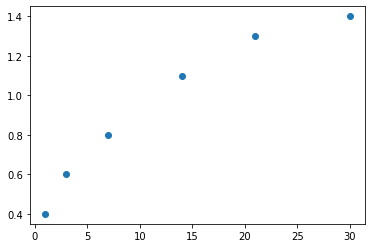

In [ ]:
# строим "точки"
import matplotlib.pyplot as plt
plt.scatter(df['day'], df['arpu'], label="Original Data")

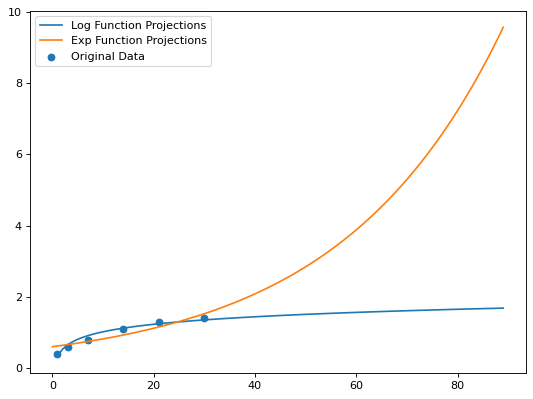

In [ ]:
# Строим график - разброс исходных точек и линий аппроксимированных кривых линий
# смотрим график исходных данных и полученных кривых
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(df['day'], df['arpu'], label="Original Data" )
plt.plot( log_y_projection, label="Log Function Projections" )
plt.plot( pow_y_projection, label="Exp Function Projections" )
plt.legend()
plt.show()


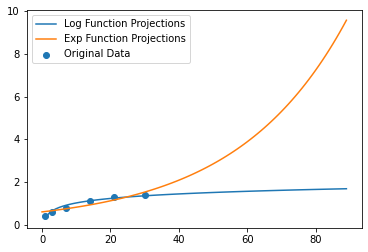

In [ ]:
# строим график исходных данных и полученных кривых: поменьше
plt.scatter(df['day'], df['arpu'], label="Original Data" )
plt.plot( log_y_projection, label="Log Function Projections" )
plt.plot( pow_y_projection, label="Exp Function Projections" )
plt.legend()
plt.show()

In [ ]:
# делаем прогноз удержанных пользователей сайта на 90й день
print('Прогноз кол-ва пользователей через 90 дней по log модели', round(log_y_projection[89],0))
print('Прогноз кол-ва пользователей через 90 дней по exp модели', round(pow_y_projection[89],0))

Прогноз кол-ва пользователей через 90 дней по log модели 2.0
Прогноз кол-ва пользователей через 90 дней по exp модели 10.0


In [ ]:
# отбираем среди прогнозов значения за 0,1,7,14,21 и 30 дни
y_log_pred = [log_y_projection[i] for i in list(df['day'])]
y_log_pred

[0.3182915337381341,
 0.6525362974984633,
 0.9103204822385534,
 1.121205448670408,
 1.2445652459988827,
 1.3530809922778193]

In [ ]:
# Отберем данные по прогнозам
y_pow_pred = [pow_y_projection[i] for i in list(df['day'])]
y_pow_pred

[0.6193285013669545,
 0.659088716032839,
 0.7464307044090908,
 0.9280456295448732,
 1.153849493904676,
 1.5266933282102846]

In [ ]:
# Попробуем вычислить среднеквадратическую ошибку
from sklearn.metrics import mean_squared_error
print('Log Function squared error: ', mean_squared_error(df['arpu'].values, y_log_pred))
print('Power Function squared error: ', mean_squared_error(df['arpu'].values, y_pow_pred))

Log Function squared error:  0.004555170184195373
Power Function squared error:  0.020240935444654523


In [ ]:
# Прогноз накопленного arpu на 90-й день для log_y_projection
print('Прогноз накопленного arpu на 90-й день :', round(log_y_projection[89],0), '$')

Прогноз накопленного arpu на 90-й день : 2.0 $


In [ ]:
# Прогноз накопленного arpu на 90-й день для pow_y_projection
print('Прогноз накопленного arpu на 90-й день :', round(pow_y_projection[89],0), '$')

Прогноз накопленного arpu на 90-й день : 10.0 $


In [ ]:
### Вывод: 
# 1) по критерию минимальной среднеквадратической ошибки логарифмическая модель лучшего качества.
 # Прогноз накопленного arpu на 90-й день : 2.0 $
# 2) по критерию минимальной среднеквадратической ошибки логарифмическая модель обычного качества. 
# Прогноз накопленного  arpu н а 90-й день : 10.0 $

**Спасибо за внимание!**